<a href="https://colab.research.google.com/github/Francanela/postech-ia-para-devs/blob/main/tech-challenge-fase-1/grupo31-fase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Challenge: Prever Custos Médicos

O desafio consiste em desenvolver um modelo preditivo de regressão para prever os custos médicos individuais com base em variáveis como idade, gênero, IMC (Índice de Massa Corporal), número de filhos, se a pessoa é fumante ou não, e a região onde mora.

### Tarefas:
1. Explorar as características dos dados (idade, gênero, IMC, filhos, fumante, região, encargos)
2. Pré-processar os dados para adequar ao modelo de regressão.
3. Criar um modelo preditivo.
4. Treinar o modelo e avaliar sua performance utilizando métricas estatísticas.
5. Apresentar resultados visuais, como gráficos de previsões vs. valores reais.

### Base de dados

A base de dados utilizada nesse notebook, segue o modelo definido pelo exercício. Ela contém os seguintes atributos, com informações individuais de usuários de planos de saúde:

*   **Age:** Idade do beneficiário
*   **Gender:** Gênero do benefiário (male / female)
*   **BMI:**   *Índice de massa corporal*. Medida internacional usada para calcular se uma pessoa está no peso ideal, calculado a partir da relação entre altura e peso (kg / m ^ 2), idealmente os valores considerados saudáveis devem ficar entre 18,5 a 24,9.
*   **Children:** Quantidade de filhos do beneficiário, cobertos pelo plano de saúde
*   **Smoker:** Indica se o beneficiário é fumante ou não
*   **Region:** Região geográfica da localização do beneficiário. Considerando regiões dos EUA ( northeast, southeast, southwest, northwest).
*   **Charges:** Valores gastos com plano de saúde


###Fonte Kaggle: [insurance.csv](https://www.kaggle.com/datasets/mirichoi0218/insurance)

## 1. Importando as bibliotecas necessárias para o projeto

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Carregando dados

In [24]:
import pandas as pd
# URL dos dados de custos médicos
url = 'https://raw.githubusercontent.com/Francanela/postech-ia-para-devs/refs/heads/main/tech-challenge-fase-1/datasource/insurance.csv'

# Ler os dados diretamente do link
df = pd.read_csv(url)

# Renomear as colunas de inglês para português
df.rename(columns={
    'age': 'idade',
    'sex': 'genero',
    'bmi': 'imc',
    'children': 'filhos',
    'smoker': 'fumante',
    'region': 'região',
    'charges': 'encargos'
}, inplace=True)

# Exibir as primeiras linhas para confirmar a renomeação
print("Colunas após renomeação:")
print(df.head())

Colunas após renomeação:
   idade  genero     imc  filhos fumante     região     encargos
0     19  female  27.900       0     yes  southwest  16884.92400
1     18    male  33.770       1      no  southeast   1725.55230
2     28    male  33.000       3      no  southeast   4449.46200
3     33    male  22.705       0      no  northwest  21984.47061
4     32    male  28.880       0      no  northwest   3866.85520


## 3. PRÉ-PROCESSAMENTO DOS DADOS

### Limpeza dos dados
Etapas para garantir a qualidade dos dados

* Verificação de valores nulos:

    Como não há valores nulos não é necessário tratamento



In [25]:
df.isnull().any()

,0
idade,False
genero,False
imc,False
filhos,False
fumante,False
região,False
encargos,False


* Remoção de linhas duplicadas:

    Foi utilizado drop_duplicates() para remover linhas duplicadas no dataset.

    **Justificativa**: Linhas duplicadas podem causar viés no modelo preditivo, não é possível identificar se são dois registros distintos uma vez que não possuímos um identificador único e existe apenas uma incidencia.


In [26]:
df.duplicated().value_counts()

,count
False,1337
True,1


In [27]:
df.drop_duplicates(inplace=True)

### EDA - Análise exploratória dos dados

Vamos analisar quantos dados existem na nossa base

In [28]:
df.shape

(1337, 7)

Agora vamos analisar o formato dos dados

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1337 non-null   int64  
 1   genero    1337 non-null   object 
 2   imc       1337 non-null   float64
 3   filhos    1337 non-null   int64  
 4   fumante   1337 non-null   object 
 5   região    1337 non-null   object 
 6   encargos  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [30]:
df.head()

,idade,genero,imc,filhos,fumante,região,encargos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Podemos perceber que as propriedades age, bmi, children e charges são numéricas. Já as propriedades sex, smoker e region são propriedades categóricas.

Considerando as variáveis numéricas, vamos ver a distribuição delas em gráficos

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'encargos'}>]], dtype=object)

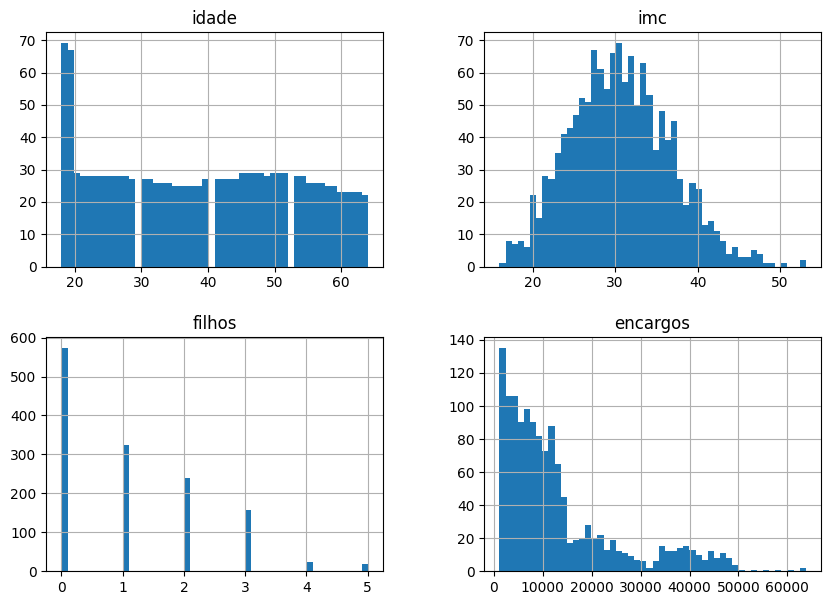

In [31]:
df.hist(bins=50, figsize=(10,7))

Podemos concluir a partir dos gráficos acima que:

*   A maioria dos usuários de planos de saúde, são pessoas jovens e sem filhos.
*   A maioria dos usuários está acima do peso. Considerando que a classificação do IMC para sobrepeso tem como base valores entre 25 e 39
*   Os valores possuem dimensões diferentes, Talvez seja necessário normalizar os dados


Vamos analisar a distribuição das propriedades utilizando gráficos de Boxplot

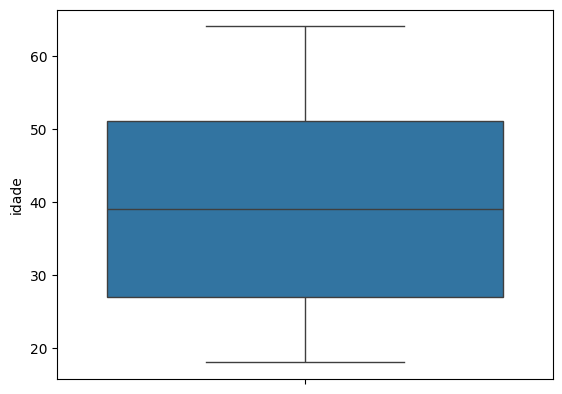

In [11]:
sns.boxplot(data=df, y='idade');

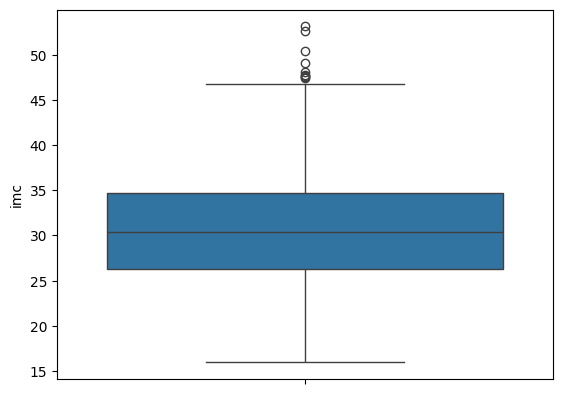

In [12]:
sns.boxplot(data=df, y='imc');

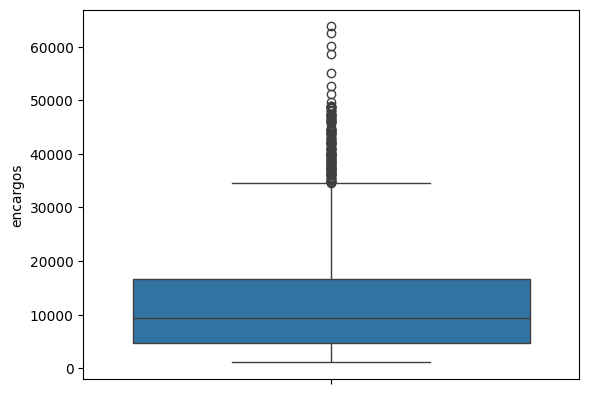

In [13]:
sns.boxplot(data=df, y='encargos');

Podemos observar que existem outliers nos valores de gastos e IMC. É interessante analisar a performance do modelo com e sem os outliers na base.


Vamos agora analisar a relação entre as variáveis nos seguintes cenários:

 - Qual a proporção de gastos em relação ao sexo do usuário
 - Qual a proporção de gastos em relação a idade
 - Qual a proporção de gastos em relação ao BMI
 - Qual a proporção de gastos em relação ao fato de ser fumante / não
 - Qual a proporção de gastos em relação a quantidade de crianças

#### Gastos x Sexo

Vamos primeiro analisar a quantidade de homens e mulheres na nossa base

<Axes: xlabel='genero', ylabel='count'>

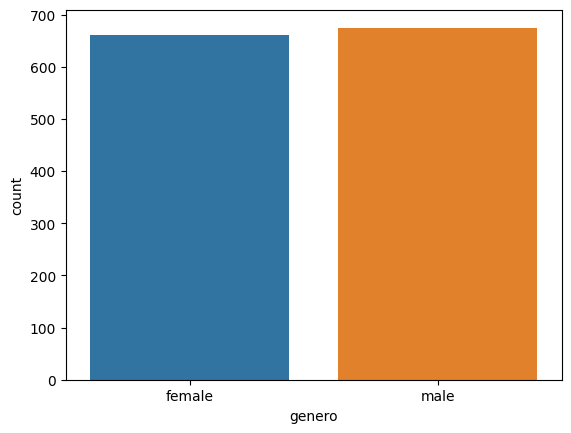

In [14]:
sns.countplot(x = 'genero', hue = 'genero', data = df)

Nossa base de dados está bem balanceada em relação à quantidade de usuários homens e mulheres. Não existe uma diferença significativa entre eles.

Agora vamos analisar a diferença de gastos, em média, entre homens e mulheres

#### Gastos x IMC

Vamos analisar a relação entre IMC (bmi) e gastos

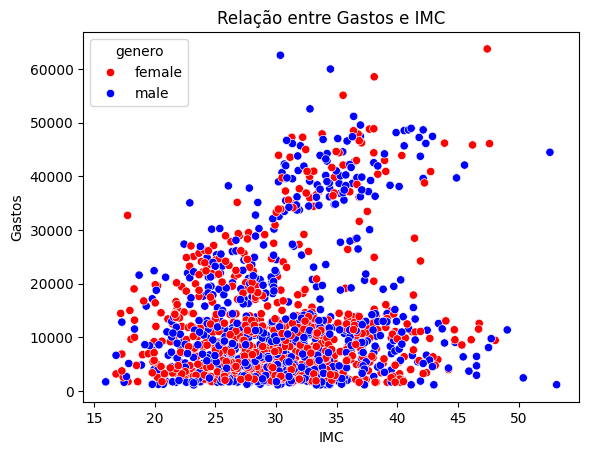

In [32]:
  sns.scatterplot(x='imc', y='encargos',  hue='genero', data=df,palette={'male': 'blue', 'female': 'red'})
  plt.title('Relação entre Gastos e IMC')
  plt.xlabel('IMC')
  plt.ylabel('Gastos')
  plt.show()

Podemos perceber uma grande quantidade de usuários, com IMC acima de 30 ( indicando Obesidade), pagando valores mais altos. Isso deve indicar que usuários com Obesidade acabam gastando mais com planos de saúde.

Vamos analisar a relação entre gastos e fumantes


#### Gastos x Fumantes

Vamos analisar se existe relação entre usuários fumantes e os valores gastos com planos de saúde

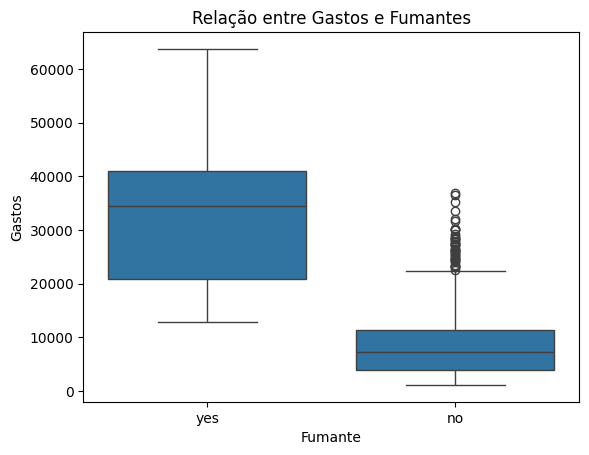

In [34]:
sns.boxplot(x='fumante', y='encargos', data=df)
plt.title('Relação entre Gastos e Fumantes')
plt.xlabel('Fumante')
plt.ylabel('Gastos')
plt.show()

Podemos perceber que usuários fumantes gastam consideravelmente mais do que usuários não fumantes.

Já que existe uma relação entre gastos e fumantes e gastos e o IMC do usuário. Vamos analisar a relação entre `gastos x fumantes x IMC`

#### Gastos x Fumantes x IMC

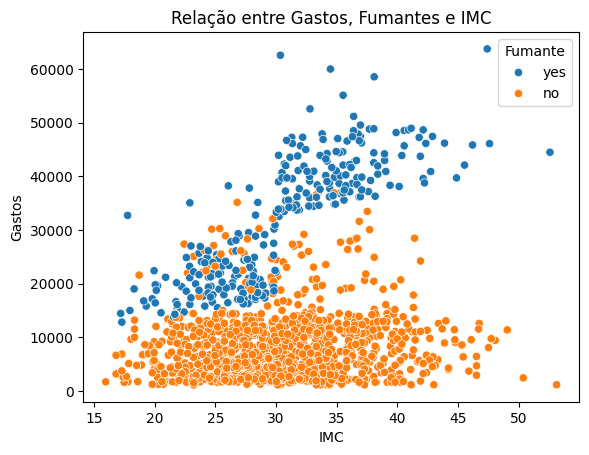

In [35]:
sns.scatterplot(data=df, x='imc', y='encargos', hue='fumante')
plt.title('Relação entre Gastos, Fumantes e IMC')
plt.xlabel('IMC')
plt.ylabel('Gastos')
plt.legend(title='Fumante')
plt.show()



*   **Gastos x Fumantes:** É bem claro no gráfico acima que usuários fumantes tendem a ter gastos significativamente mais altos comparados com os não fumantes. Essa relação existe independentemente do IMC. Isso sugere que ser fumante é uma característica significativa que aumenta os custos com planos de saúde.
*   **Gastos x IMC:** Tanto para fumantes como para não fumantes, existe uma tendência de aumento dos gastos em pessoas com IMC acima de sobrepeso. No entanto, esse aumento é mais acentuado nos fumantes.
*  **Fumante x IMC:** A relação entre ser fumante e ter um IMC elevado potencializa os gastos com planos de saúde. Fumantes com IMC mais alto estão entre os que têm os maiores gastos médicos.


#### Gastos x Fumantes x Idade

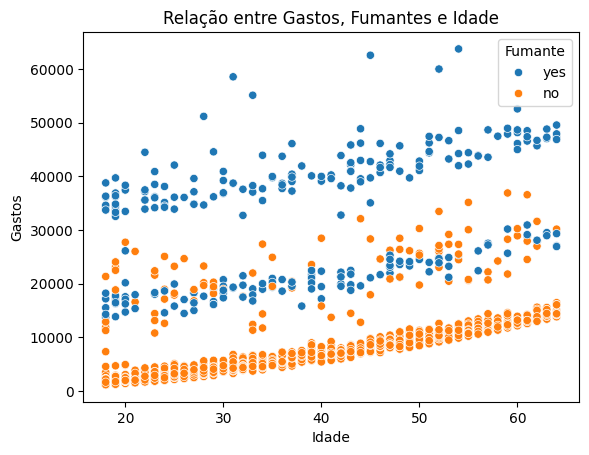

In [39]:
sns.scatterplot(data=df, x='idade', y='encargos', hue='fumante')
plt.title('Relação entre Gastos, Fumantes e Idade')
plt.xlabel('Idade')
plt.ylabel('Gastos')
plt.legend(title='Fumante')
plt.show()

Já verificamos em gráficos anteriores que a idade é um fator que aumenta os gastos com plano de saúde. No gráfico acima podemos perceber também que independente da idade, fumantes pessoas fumantes vão ter gastos mais elevados com planos de saúde.


Vamos analisar a correlação entre as variáveis

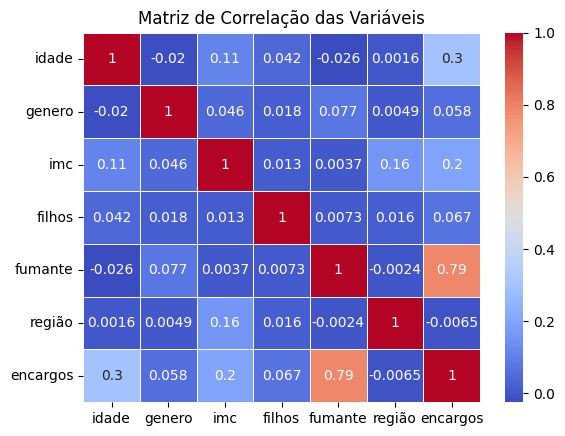

<Figure size 1200x800 with 0 Axes>

In [41]:
#Aplicar Label Encoder

from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Calcular a matriz de correlação
corr_matrx = df.corr()

sns.heatmap(corr_matrx, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis')
plt.figure(figsize=(12, 8))
plt.show()

Analisando a matriz de correlação acima, podemos confirmar o que já verificamos anteriormente. As features que mais influenciam os gastos são:


*   Ser fumante
*   Alto IMC
*   Idade


O número de filhos e a região têm pouca influência nos gastos médicos.

A forte correlação entre fumar e os gastos nos mostra a importância de considerar, no nosso modelo preditivo, a caracteristica de ser ou não fumante.

## Modelo Preditivo

Vamos construir o nosso modelo, considerando diferentes algoritmos para verificar qual tem a melhor performance

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def best_model(x, y):

  # Dividir os dados em treino e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Padronizar os dados
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Hiperparâmetros foram definidos a partir de testes com valores aleatórios
  # Os valores definidos foram os que geraram melhor resultado
  hiper_params = {
    'n_estimators': 400,
    'max_depth': 30,
    'min_samples_split': 9,
    'min_samples_leaf': 9,
  }

  # Inicializar os modelos
  models = {
      'Linear Regression': LinearRegression(),
      'Decision Tree': DecisionTreeRegressor(
          max_depth=hiper_params['max_depth'],
          min_samples_split=hiper_params['min_samples_split'],
          min_samples_leaf=hiper_params['min_samples_leaf'],
      ),
      'Random Forest Regressor ': RandomForestRegressor(
          n_estimators=hiper_params['n_estimators'],
          max_depth=hiper_params['max_depth'],
          min_samples_split=hiper_params['min_samples_split'],
          min_samples_leaf=hiper_params['min_samples_leaf'],
          random_state=7)
  }

  # Lista para armazenar os resultados
  results = []

  # Treinar e avaliar os modelos
  for model_name, model in models.items():
      model.fit(X_train_scaled, y_train)
      y_pred = model.predict(X_test_scaled)
      r2 = r2_score(y_test, y_pred)
      mse = mean_squared_error(y_test, y_pred)
      rmse = np.sqrt(mse)
      mae = mean_absolute_error(y_test, y_pred)
      results.append({
          'Model': model_name,
          'R^2': r2,
          'MSE': mse,
          'RMSE': rmse,
          'MAE': mae,
      })

      # Visualizar as previsões de cada modelo
      plt.figure(figsize=(10, 6))
      plt.scatter(y_test, y_pred, alpha=0.3)
      plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
      plt.xlabel('Valores Reais')
      plt.ylabel('Previsões')
      plt.title(f'Previsões vs. Valores Reais ({model_name})')
      plt.show()

  # Converter a lista de resultados para um DataFrame
  results_df = pd.DataFrame(results)

  # Exibir os resultados
  print(results_df)

  # Identificar o melhor modelo com base no R²
  best_model_name = results_df.loc[results_df['R^2'].idxmax()]['Model']
  print(f'Com base no R^2 o melhor modelo é: {best_model_name}')

  # Visualizar as previsões do melhor modelo
  best_model = models[best_model_name]
  y_pred_best = best_model.predict(X_test_scaled)


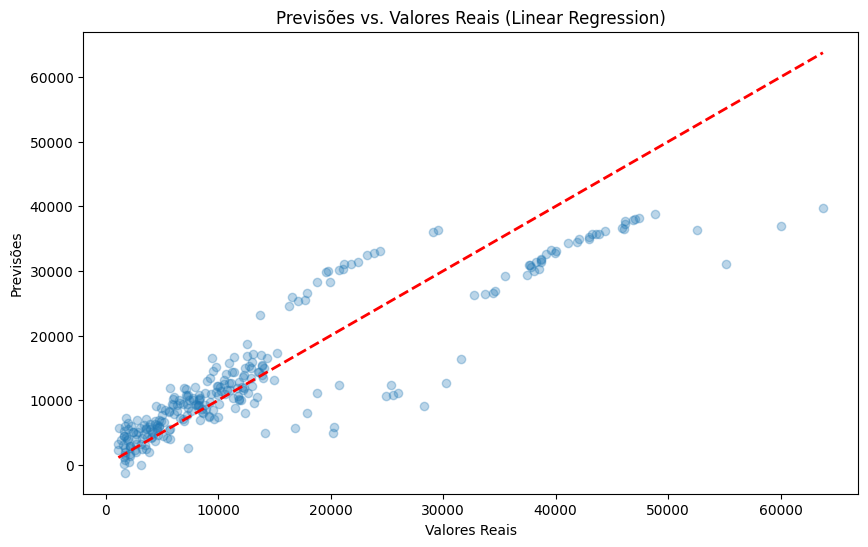

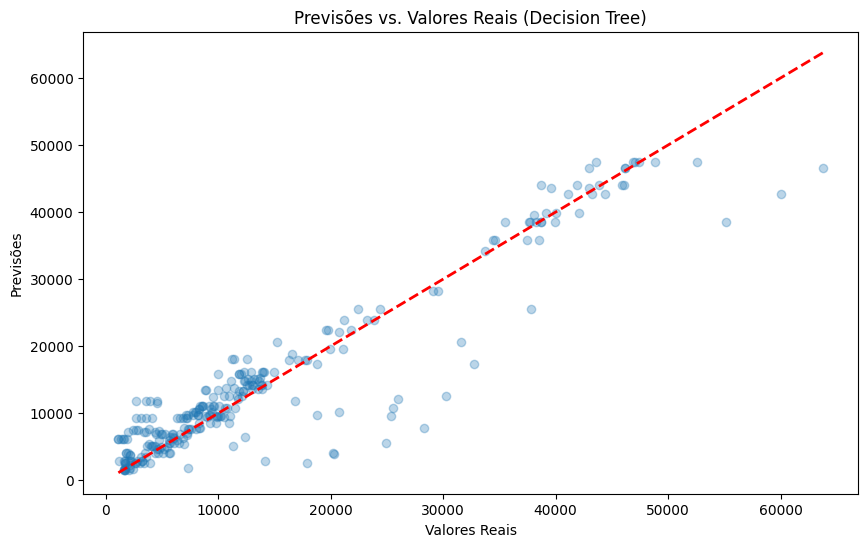

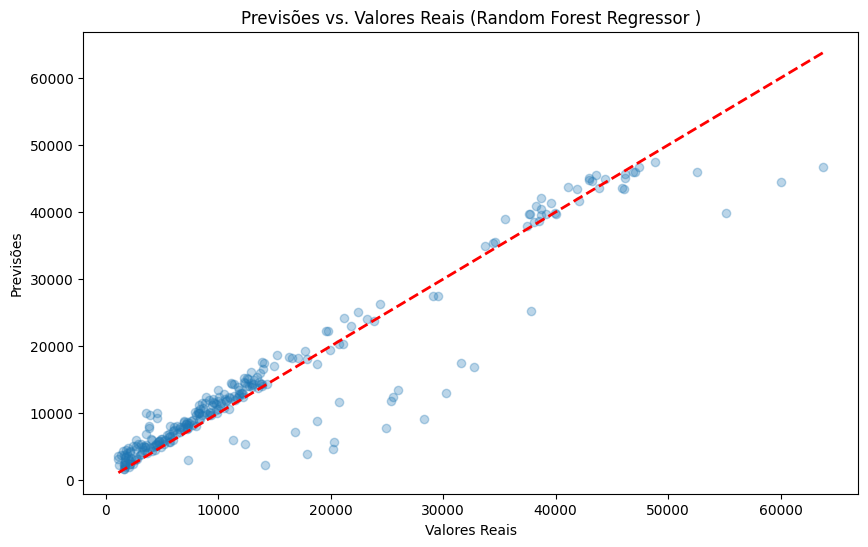

                      Model       R^2           MSE         RMSE          MAE
0         Linear Regression  0.806847  3.549310e+07  5957.608800  4182.353155
1             Decision Tree  0.879587  2.212657e+07  4703.888841  2750.517034
2  Random Forest Regressor   0.901478  1.810403e+07  4254.883296  2440.429882
O melhor modelo é: Random Forest Regressor 


In [44]:
# Testar modelo
# Separar variáveis independentes e dependentes
X = df.drop('encargos', axis=1)
y = df.encargos
best_model(X, y)

# Testar modelo, removendo outliers

# Definindo primeiro e terceiro quartis para calculo do IQR
# Q1 = data['charges'].quantile(0.25)
# Q3 = data['charges'].quantile(0.75)
# IQR = Q3 - Q1

# bottom_threshold = Q1 - 1.5 * IQR
# top_threshold = Q3 + 1.5 * IQR

# no_outliers_data = data[(data['charges'] >= bottom_threshold) & (data['charges'] <= top_threshold)]
# X = no_outliers_data.drop('charges', axis=1)
# y = no_outliers_data['charges']
# best_model(X,y)

| **Biblioteca** | **Descrição** |
|----------------|---------------|
| **NumPy**      | NumPy é usada para operações com arrays e funções matemáticas. Neste projeto, foi utilizada para gerar dados simulados. |
| **Pandas**     | Pandas é usada para manipulação e análise de dados tabulares. Foi utilizada para criar e explorar DataFrames. |
| **Seaborn**    | Seaborn é uma biblioteca de visualização de dados. Utilizada para criar gráficos de distribuição e barras de forma simples e intuitiva. |
| **Matplotlib** | Matplotlib é uma biblioteca de gráficos 2D. Usada para gerar gráficos de dispersão, comparando previsões com valores reais. |
| **Scikit-learn (sklearn)** | Biblioteca para aprendizado de máquina. Utilizada para modelagem e avaliação de regressão (Regressão Linear, divisão de dados, métricas de desempenho). |
